In [50]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
import os
import sys
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
from arch import arch_model
import statsmodels.formula.api as smf
import pandas_datareader as pdr
from pandas.plotting import scatter_matrix
plt.style.use("seaborn")
import seaborn

In [2]:
master_data=pd.read_csv('C:\\Users\\PC\\Desktop\\Thesis\\database\\thesis_data\\master_data_cleaned.csv',index_col='Date')
master_data.index=pd.to_datetime(master_data.index)

In [3]:
#^HSI and ^GSPTSE: 0.006458556382781373
ratios=master_data['^HSI']/master_data['^GSPTSE']
train = ratios[:2791]
test = ratios[2791:]

In [13]:
len(ratios.index)

4654

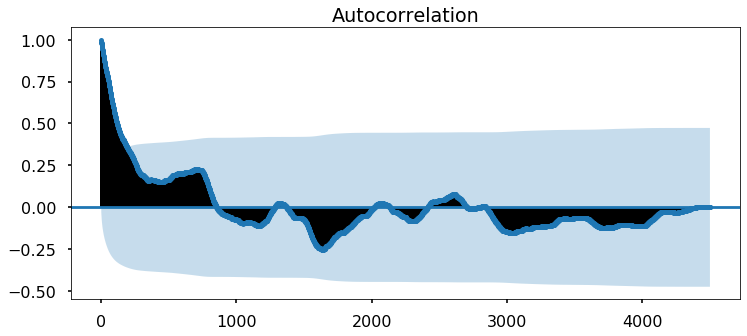

In [15]:
# the autocorrelation chart provides just the correlation at increasing lags
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(ratios, lags=4500, ax=ax)
plt.show()

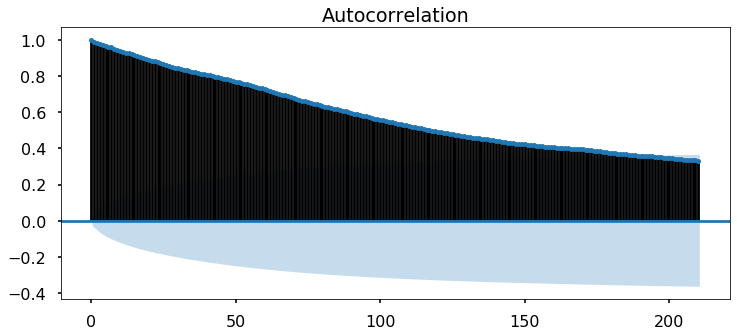

In [18]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(ratios, lags=210, ax=ax)
plt.show()

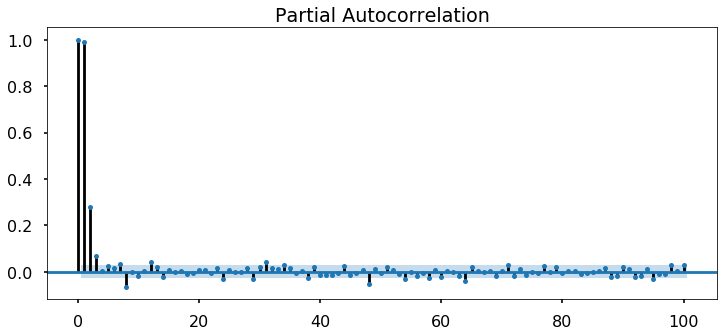

In [23]:
fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(ratios, lags=100, ax=ax)
plt.show()

In [25]:
ar1 = ARMA(tuple(train), (190, 7)).fit()
ar1.summary()
#MemoryError: Unable to allocate 9.71 GiB for an array with shape (36100, 36100) and data type float64

MemoryError: Unable to allocate 9.71 GiB for an array with shape (36100, 36100) and data type float64

In [27]:
ar1=ARMA(tuple(train),(10,3)).fit()
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 2791
Model:                    ARMA(10, 3)   Log Likelihood                6267.697
Method:                       css-mle   S.D. of innovations              0.026
Date:                Tue, 11 Aug 2020   AIC                         -12505.394
Time:                        18:48:22   BIC                         -12416.382
Sample:                             0   HQIC                        -12473.259
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6017      0.060     26.843      0.000       1.485       1.719
ar.L1.y       -0.5040      0.331     -1.521      0.128      -1.154       0.146
ar.L2.y        0.4198      0.244      1.718      0.086      -0.059       0.899
ar.L3.y        0.9908      0.084     11.832      0.000       0.827       1.155
ar.L4.y        0.0267      0.343      0.078      0.938      -0.645       0.698
ar.L5.y       -0.0311      0.097     -0.321      0.748      -0.221       0.159
ar.L6.y        0.0168      0.032      0.524      0.601      -0.046       0.080
ar.L7.y        0.1078      0.031      3.527      0.000       0.048       0.168
ar.L8.y        0.0325      0.034      0.960      0.337      -0.034       0.099
ar.L9.y       -0.0367      0.024     -1.548      0.122      -0.083       0.010
ar.L10.y      -0.0423      0.020     -2.073      0.038      -0.082      -0.002
ma.L1.y        1.1792      0.331      3.558      0.000       0.530       1.829
ma.L2.y        0.6176      0.467      1.322      0.186      -0.298       1.534
ma.L3.y       -0.2387      0.316     -0.755      0.450      -0.859       0.381
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0054           -0.0000j            1.0054           -0.0000
AR.2             1.6337           -0.0000j            1.6337           -0.0000
AR.3             0.9331           -1.1627j            1.4909           -0.1424
AR.4             0.9331           +1.1627j            1.4909            0.1424
AR.5            -0.7465           -0.6946j            1.0197           -0.3807
AR.6            -0.7465           +0.6946j            1.0197            0.3807
AR.7            -0.4829           -1.4604j            1.5381           -0.3008
AR.8            -0.4829           +1.4604j            1.5381            0.3008
AR.9            -1.4573           -0.7148j            1.6232           -0.4274
AR.10           -1.4573           +0.7148j            1.6232            0.4274
MA.1            -0.7357           -0.7007j            1.0160           -0.3789
MA.2            -0.7357           +0.7007j            1.0160            0.3789
MA.3             4.0593           -0.0000j            4.0593           -0.0000
------------------------------------------------------------------------------
"""

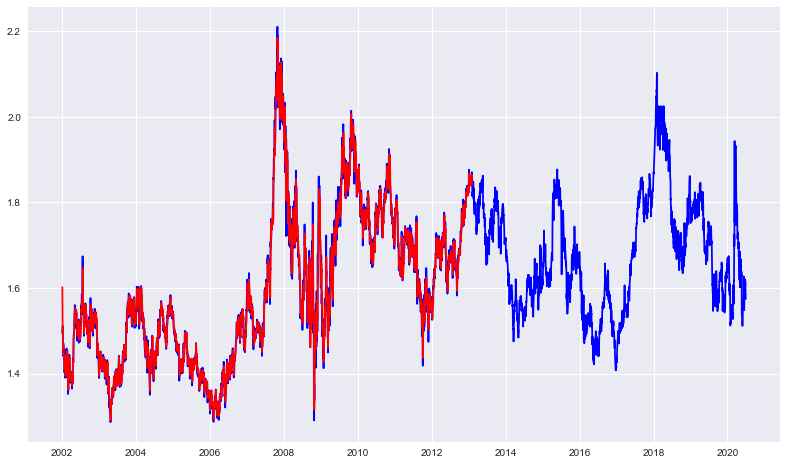

In [51]:
plt.figure(figsize=(12, 8))
plt.plot(ratios.index,ratios.values, color='blue')
preds = ar1.fittedvalues
plt.plot(train.index,preds, color='red')
plt.show()

In [37]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

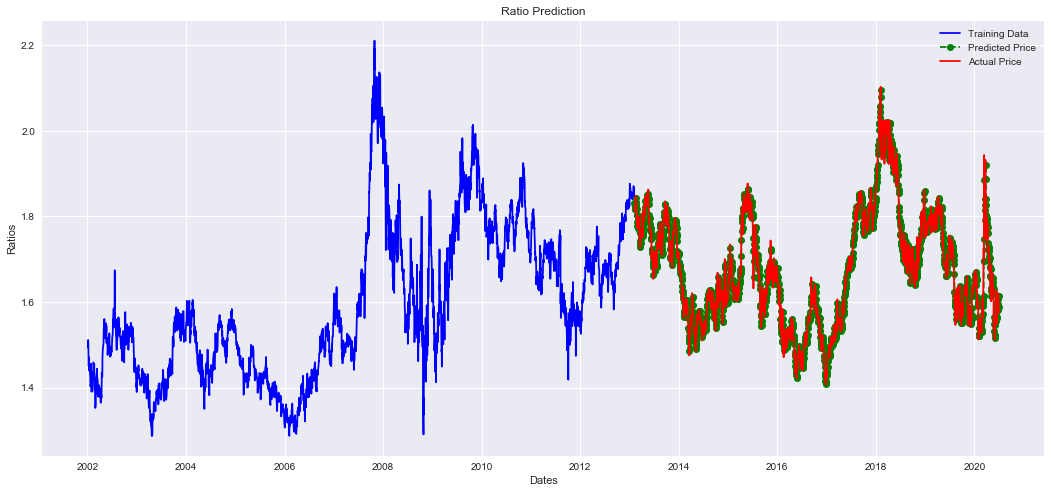

In [52]:
plt.figure(figsize=(16,8))
plt.plot(train,'green',color='blue',label='Training Data')
plt.plot(test.index, predictions, color='green',marker='o',linestyle='dashed',label='Predicted Price')
plt.plot(test.index, test, color='red',label='Actual Price')
plt.title('Ratio Prediction')
plt.xlabel('Dates')
plt.ylabel('Ratios')
plt.legend()

In [4]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(1,4) # [1,2,3]
    for i in pq_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,0,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, 0, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: %6.5f | order: %s'%(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [5]:
windowLength = 252
foreLength = len(train) - windowLength

In [17]:
signal = 0*train[-foreLength:]
for d in range(foreLength):
    # create a rolling window by selecting the values between 1+d and k+d of S&P500 returns
    TS = train[(1+d):(windowLength+d)] 
    # Find the best ARIMA fit (we set differencing to 0 since we've already differenced the series once)
    res_tup = _get_best_model(TS)
    order = res_tup[1]
    arima_model = res_tup[2]

aic: -1239.83055 | order: (1, 0, 1)
aic: -1242.57347 | order: (3, 0, 3)
aic: -1246.09333 | order: (3, 0, 3)
aic: -1244.81757 | order: (3, 0, 3)
aic: -1243.18823 | order: (1, 0, 1)
aic: -1243.56977 | order: (1, 0, 1)
aic: -1247.46103 | order: (3, 0, 3)
aic: -1245.17719 | order: (1, 0, 1)
aic: -1240.87095 | order: (3, 0, 1)
aic: -1243.77223 | order: (1, 0, 1)
aic: -1243.65436 | order: (3, 0, 3)
aic: -1241.03367 | order: (1, 0, 3)
aic: -1247.54991 | order: (3, 0, 3)
aic: -1245.39763 | order: (1, 0, 1)
aic: -1245.77304 | order: (1, 0, 1)
aic: -1249.31247 | order: (3, 0, 3)
aic: -1250.92698 | order: (1, 0, 2)
aic: -1254.00495 | order: (1, 0, 1)
aic: -1254.04148 | order: (1, 0, 1)
aic: -1255.21807 | order: (1, 0, 1)
aic: -1255.14125 | order: (1, 0, 1)
aic: -1255.82179 | order: (3, 0, 3)
aic: -1255.82373 | order: (1, 0, 1)
aic: -1256.57417 | order: (3, 0, 3)
aic: -1258.98894 | order: (1, 0, 1)
aic: -1258.05945 | order: (1, 0, 1)
aic: -1259.13351 | order: (3, 0, 3)
aic: -1258.27499 | order: (3

aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf 

aic: -1360.19356 | order: (2, 0, 2)
aic: -1359.40479 | order: (2, 0, 2)
aic: -1361.03159 | order: (2, 0, 2)
aic: -1361.01524 | order: (2, 0, 2)
aic: -1363.15921 | order: (2, 0, 2)
aic: -1375.43764 | order: (2, 0, 2)
aic: -1375.87291 | order: (2, 0, 2)
aic: -1373.47940 | order: (2, 0, 2)
aic: -1373.30259 | order: (2, 0, 2)
aic: -1373.81059 | order: (2, 0, 2)
aic: -1375.51615 | order: (2, 0, 2)
aic: -1375.85542 | order: (2, 0, 2)
aic: -1375.55864 | order: (2, 0, 2)
aic: -1377.20959 | order: (2, 0, 2)
aic: -1378.36317 | order: (2, 0, 2)
aic: -1377.50179 | order: (2, 0, 2)
aic: -1378.43937 | order: (2, 0, 2)
aic: -1378.43182 | order: (2, 0, 2)
aic: -1378.56655 | order: (2, 0, 2)
aic: -1378.47755 | order: (2, 0, 2)
aic: -1378.40877 | order: (2, 0, 2)
aic: -1380.31236 | order: (2, 0, 2)
aic: -1379.82242 | order: (2, 0, 2)
aic: -1380.81326 | order: (2, 0, 2)
aic: -1382.47045 | order: (2, 0, 2)
aic: -1382.09650 | order: (2, 0, 2)
aic: -1384.00497 | order: (2, 0, 2)
aic: -1379.35133 | order: (2

aic: -1482.18081 | order: (2, 0, 1)
aic: -1484.39171 | order: (2, 0, 1)
aic: -1484.13323 | order: (2, 0, 1)
aic: -1480.31312 | order: (1, 0, 1)
aic: -1479.33866 | order: (1, 0, 1)
aic: -1478.82808 | order: (1, 0, 1)
aic: -1482.48327 | order: (2, 0, 1)
aic: -1480.17808 | order: (2, 0, 1)
aic: -1482.93541 | order: (2, 0, 1)
aic: -1479.65788 | order: (2, 0, 1)
aic: -1479.75752 | order: (2, 0, 1)
aic: -1479.56388 | order: (2, 0, 1)
aic: -1480.91824 | order: (2, 0, 1)
aic: -1480.61090 | order: (2, 0, 1)
aic: -1476.72408 | order: (2, 0, 1)
aic: -1477.35552 | order: (2, 0, 1)
aic: -1477.74875 | order: (2, 0, 1)
aic: -1477.72808 | order: (2, 0, 1)
aic: -1472.60345 | order: (2, 0, 1)
aic: -1472.38720 | order: (2, 0, 1)
aic: -1472.48333 | order: (2, 0, 1)
aic: -1469.94317 | order: (2, 0, 1)
aic: -1472.30250 | order: (2, 0, 1)
aic: -1476.35604 | order: (2, 0, 1)
aic: -1476.73642 | order: (2, 0, 1)
aic: -1476.75628 | order: (2, 0, 1)
aic: -1472.71379 | order: (2, 0, 1)
aic: -1474.94214 | order: (2

aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf 

aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic:    inf 

aic: -811.88124 | order: (1, 0, 1)
aic: -809.93552 | order: (1, 0, 1)
aic: -811.34110 | order: (1, 0, 1)
aic: -811.88277 | order: (1, 0, 1)
aic: -811.50061 | order: (1, 0, 1)
aic: -812.46203 | order: (1, 0, 1)
aic: -812.51852 | order: (1, 0, 1)
aic: -811.48307 | order: (1, 0, 1)
aic: -809.09999 | order: (1, 0, 1)
aic: -809.03969 | order: (1, 0, 1)
aic: -807.20525 | order: (1, 0, 1)
aic: -806.29259 | order: (3, 0, 1)
aic: -805.32048 | order: (3, 0, 1)
aic: -807.72343 | order: (3, 0, 1)
aic: -807.77355 | order: (3, 0, 1)
aic: -805.40722 | order: (3, 0, 1)
aic: -805.00702 | order: (3, 0, 1)
aic: -804.84597 | order: (3, 0, 1)
aic: -805.34543 | order: (1, 0, 1)
aic: -804.13725 | order: (1, 0, 1)
aic: -804.64055 | order: (1, 0, 1)
aic: -803.20422 | order: (1, 0, 1)
aic: -803.36742 | order: (1, 0, 1)
aic: -803.46906 | order: (1, 0, 1)
aic: -803.93985 | order: (1, 0, 1)
aic: -803.98405 | order: (1, 0, 1)
aic: -803.90303 | order: (1, 0, 1)
aic: -800.83620 | order: (1, 0, 1)
aic: -800.91848 | or

aic: -1075.52025 | order: (2, 0, 2)
aic: -1074.30122 | order: (1, 0, 1)
aic: -1074.52859 | order: (1, 0, 1)
aic: -1088.00331 | order: (1, 0, 1)
aic: -1084.83043 | order: (1, 0, 1)
aic: -1086.82473 | order: (1, 0, 1)
aic: -1087.12530 | order: (1, 0, 1)
aic: -1086.25628 | order: (1, 0, 1)
aic: -1089.79129 | order: (1, 0, 1)
aic: -1091.29256 | order: (1, 0, 1)
aic: -1091.37164 | order: (1, 0, 1)
aic: -1091.02975 | order: (1, 0, 1)
aic: -1090.91751 | order: (1, 0, 1)
aic: -1097.57868 | order: (3, 0, 3)
aic: -1098.08584 | order: (3, 0, 3)
aic: -1098.52203 | order: (3, 0, 3)
aic: -1098.43293 | order: (3, 0, 3)
aic: -1098.44188 | order: (3, 0, 3)
aic: -1095.01347 | order: (3, 0, 3)
aic: -1095.62870 | order: (1, 0, 1)
aic: -1095.85069 | order: (1, 0, 1)
aic: -1102.73170 | order: (3, 0, 3)
aic: -1104.29377 | order: (1, 0, 2)
aic: -1102.80487 | order: (1, 0, 2)
aic: -1102.37847 | order: (1, 0, 2)
aic: -1102.47049 | order: (1, 0, 2)
aic: -1103.01322 | order: (1, 0, 2)
aic: -1102.51080 | order: (1

aic: -1279.69158 | order: (1, 0, 2)
aic: -1280.34191 | order: (1, 0, 2)
aic: -1280.85330 | order: (1, 0, 2)
aic: -1281.77459 | order: (1, 0, 2)
aic: -1281.01560 | order: (1, 0, 2)
aic: -1282.74413 | order: (1, 0, 2)
aic: -1282.48614 | order: (1, 0, 2)
aic: -1282.90523 | order: (3, 0, 1)
aic: -1285.56952 | order: (1, 0, 2)
aic: -1286.38537 | order: (1, 0, 2)
aic: -1286.99377 | order: (1, 0, 2)
aic: -1287.41541 | order: (1, 0, 2)
aic: -1288.38864 | order: (1, 0, 2)
aic: -1285.61464 | order: (2, 0, 1)
aic:    inf | order: None
aic:    inf | order: None
aic:    inf | order: None
aic: -1288.40503 | order: (1, 0, 3)
aic: -1292.36045 | order: (1, 0, 2)
aic:    inf | order: None
aic: -1289.40277 | order: (3, 0, 1)
aic:    inf | order: None
aic: -1289.72747 | order: (2, 0, 1)
aic:    inf | order: None
aic: -1290.24942 | order: (1, 0, 3)
aic: -1291.99802 | order: (1, 0, 2)
aic: -1302.58878 | order: (1, 0, 2)
aic: -1298.47780 | order: (1, 0, 2)
aic: -1298.50515 | order: (1, 0, 2)
aic: -1303.43342

aic:    inf | order: None
aic: -1124.64441 | order: (2, 0, 3)
aic: -1125.87000 | order: (2, 0, 1)
aic: -1125.97958 | order: (2, 0, 3)
aic: -1125.07876 | order: (2, 0, 1)
aic: -1124.02334 | order: (2, 0, 1)
aic: -1122.43768 | order: (2, 0, 3)
aic: -1122.43441 | order: (2, 0, 3)
aic: -1123.11492 | order: (2, 0, 3)
aic: -1122.89017 | order: (2, 0, 3)
aic: -1122.08217 | order: (2, 0, 3)
aic: -1120.47721 | order: (3, 0, 2)
aic: -1118.81106 | order: (3, 0, 2)
aic: -1118.81634 | order: (3, 0, 2)
aic: -1119.07756 | order: (2, 0, 3)
aic: -1119.07921 | order: (2, 0, 3)
aic: -1117.71870 | order: (2, 0, 3)
aic: -1117.28739 | order: (2, 0, 3)
aic: -1112.95894 | order: (3, 0, 2)
aic: -1112.94950 | order: (3, 0, 2)
aic: -1113.34056 | order: (3, 0, 2)
aic: -1114.34023 | order: (3, 0, 1)
aic: -1113.72907 | order: (3, 0, 1)
aic: -1113.59784 | order: (3, 0, 1)
aic: -1113.81651 | order: (3, 0, 1)
aic: -1113.89804 | order: (3, 0, 1)
aic: -1113.60628 | order: (3, 0, 1)
aic: -1113.78091 | order: (3, 0, 1)
ai

In [25]:
#now that we have our ARIMA fit, we feed this to GARCH model
p_ = 1
o_ = 0
q_ = 1

am = arch_model(arima_model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=1, start=None, align='origin')
signal.iloc[d] = np.sign(out.mean['h.1'].iloc[-1])

AttributeError: 'NoneType' object has no attribute 'resid'

TypeError: 'NoneType' object is not subscriptable

AttributeError: 'NoneType' object has no attribute 'fittedvalues'

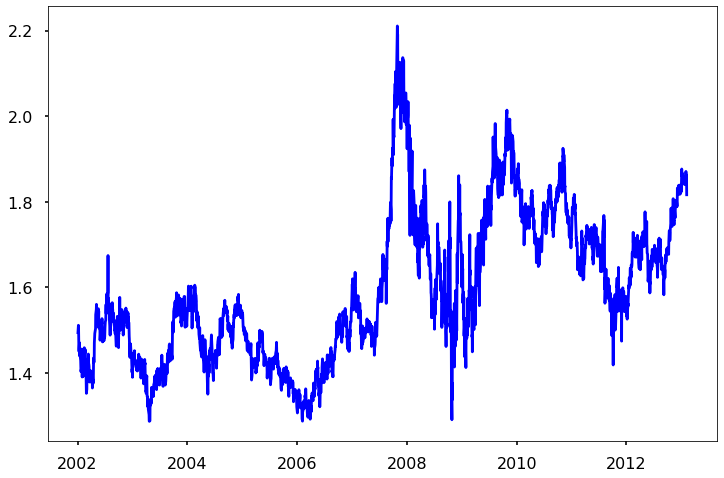

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(train, color='blue')
preds = arima_model.fittedvalues
plt.plot(preds, color='red')
plt.show()